In [1]:
#1
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#2 Imputasi nilai bmi yang hilang dengan median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Buat one-hot encoding untuk variabel kategori, buang kolom 'id'
df_encoded = pd.get_dummies(df.drop('id', axis=1), drop_first=True)
df_encoded.head()


<ipython-input-3-d1e23b34be56>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [5]:
#3 Split Dataset (Train / Test)
from sklearn.model_selection import train_test_split

X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Stratified split untuk menjaga proporsi kelas
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (4088, 16) Test: (1022, 16)


In [6]:
#4. Training Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
#5. Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[922  50]
 [ 42   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.14      0.16      0.15        50

    accuracy                           0.91      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.92      0.91      0.91      1022



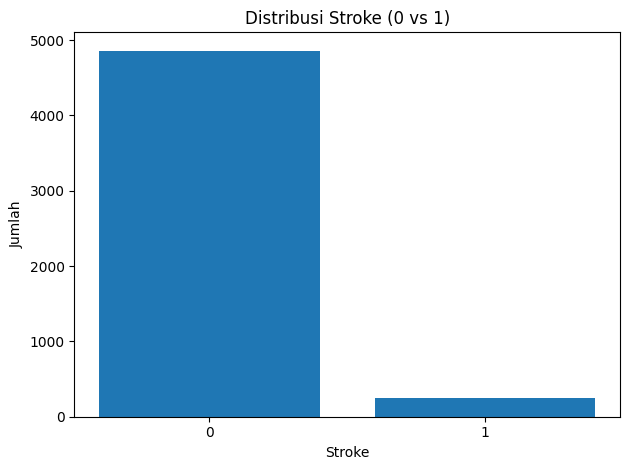

In [8]:
#6. Visualisasi
#6.1 Distribusi Target stroke
import matplotlib.pyplot as plt

counts = df['stroke'].value_counts()
plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.title('Distribusi Stroke (0 vs 1)')
plt.xlabel('Stroke')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


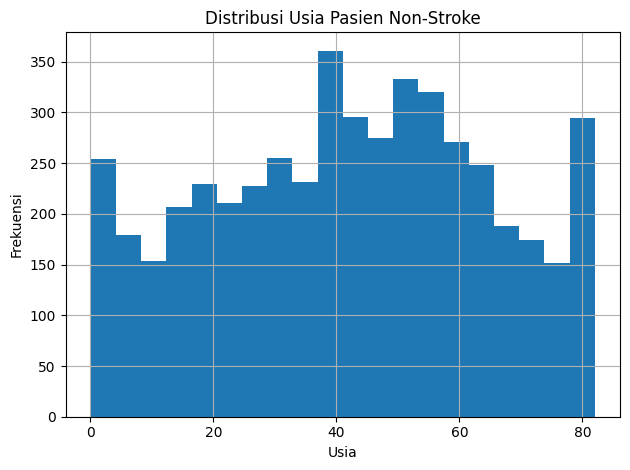

In [9]:
#6.2 Histogram Usia Pasien NonStroke
plt.figure()
df[df['stroke'] == 0]['age'].hist(bins=20)
plt.title('Distribusi Usia Pasien Non‑Stroke')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


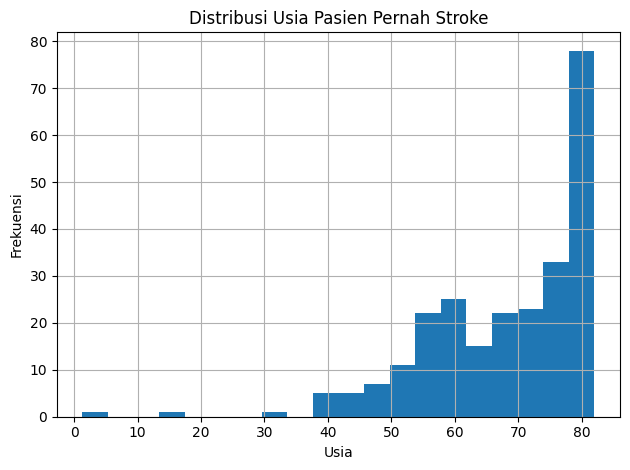

In [10]:
#6.3 Histogram Usia Pasien Pernah Stroke
plt.figure()
df[df['stroke'] == 1]['age'].hist(bins=20)
plt.title('Distribusi Usia Pasien Pernah Stroke')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


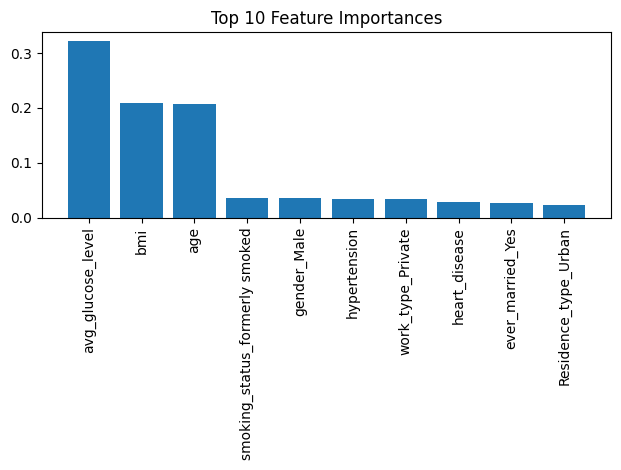

In [12]:
#6.4 Top 10 Feature Importances
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1][:10]
feat_names = X.columns

plt.figure()
plt.bar(feat_names[indices], importances[indices])
plt.xticks(rotation=90)
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()
